In [ ]:
# Cell 1: Import libraries and load the final cleaned dataset

import pandas as pd
import numpy as np

# Define the full path to your cleaned dataset
dataset_path = r"put ur path location here"  # <-- change this to your real path

# Set random seed for reproducibility (if needed in downstream cells)
np.random.seed(42)

# Load the merged and cleaned dataset
df = pd.read_csv(dataset_path)

print("=" * 80)
print("CLEANED MQ135 DATA LOADED")
print("=" * 80)
print(f"\nDataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
print(df.head())

CLEANED MQ135 DATA LOADED

Dataset shape: (6400, 3)
Columns: ['Temperature', 'Humidity', 'MQ135']

First few rows:
   Temperature   Humidity  MQ135
0    25.233198  82.965238    416
1    25.290759  84.939132    416
2    25.443288  85.727734    416
3    25.601792  85.899656    416
4    25.584350  86.103051    416


In [2]:
# Cell 2: Inspect and validate the cleaned dataset

print("=" * 80)
print("DATA INSPECTION & QUALITY CHECKS")
print("=" * 80)

# Show basic info and types
print("\n[1] Info:")
print(df.info())

# Check for missing values
print("\n[2] Missing values per column:")
print(df.isnull().sum())

# Check for zero values (should be none after cleaning, but always confirm)
print("\n[3] Zero values per column:")
for col in ['Temperature', 'Humidity', 'MQ135']:
    print(f"  {col} = 0: {(df[col] == 0).sum()}")

# Display descriptive statistics
print("\n[4] Descriptive statistics:")
print(df.describe())

# Preview first and last few rows
print("\n[5] First 5 rows:")
print(df.head())
print("\n[6] Last 5 rows:")
print(df.tail())

DATA INSPECTION & QUALITY CHECKS

[1] Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6400 entries, 0 to 6399
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  6400 non-null   float64
 1   Humidity     6400 non-null   float64
 2   MQ135        6400 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 150.1 KB
None

[2] Missing values per column:
Temperature    0
Humidity       0
MQ135          0
dtype: int64

[3] Zero values per column:
  Temperature = 0: 0
  Humidity = 0: 0
  MQ135 = 0: 0

[4] Descriptive statistics:
       Temperature     Humidity        MQ135
count  6400.000000  6400.000000  6400.000000
mean     27.160020    71.417152   416.727031
std       3.341793     9.881221    76.681407
min       1.000000     5.452148   275.000000
25%      26.630838    66.302030   354.000000
50%      27.004411    70.070346   437.000000
75%      28.588710    76.445346   473.000000
max      31.951

CORRELATION & DISTRIBUTION ANALYSIS

Correlation Matrix:
             Temperature  Humidity     MQ135
Temperature     1.000000  0.367656 -0.001581
Humidity        0.367656  1.000000  0.010523
MQ135          -0.001581  0.010523  1.000000

Key correlations with MQ135:
  Temperature <-> MQ135: -0.0016
  Humidity <-> MQ135: 0.0105



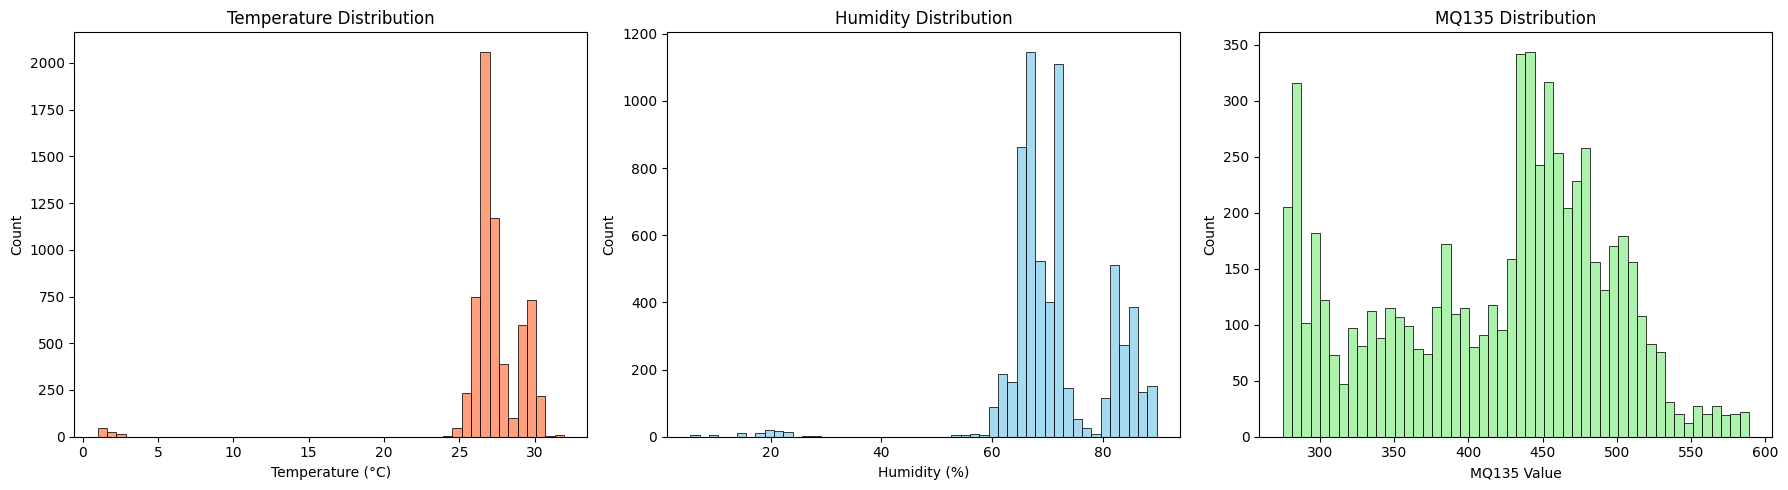

In [3]:
# Cell 3: Correlation analysis and feature distribution visualization

import matplotlib.pyplot as plt
import seaborn as sns

print("=" * 80)
print("CORRELATION & DISTRIBUTION ANALYSIS")
print("=" * 80)

# Correlation matrix
corr_matrix = df.corr()
print("\nCorrelation Matrix:")
print(corr_matrix)

print(f"\nKey correlations with MQ135:")
print(f"  Temperature <-> MQ135: {corr_matrix.loc['Temperature', 'MQ135']:.4f}")
print(f"  Humidity <-> MQ135: {corr_matrix.loc['Humidity', 'MQ135']:.4f}\n")

# Plot distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

sns.histplot(df['Temperature'], bins=50, color='coral', ax=axes[0])
axes[0].set_title('Temperature Distribution')
axes[0].set_xlabel('Temperature (°C)')

sns.histplot(df['Humidity'], bins=50, color='skyblue', ax=axes[1])
axes[1].set_title('Humidity Distribution')
axes[1].set_xlabel('Humidity (%)')

sns.histplot(df['MQ135'], bins=50, color='lightgreen', ax=axes[2])
axes[2].set_title('MQ135 Distribution')
axes[2].set_xlabel('MQ135 Value')

plt.tight_layout()
plt.show()

In [4]:
# Cell 4: Feature engineering and scaling MQ135

from sklearn.preprocessing import MinMaxScaler

# Add a dummy 'Time' column for demonstration (Assuming hourly intervals)
# Replace or modify with actual timestamps if available
df['Time'] = pd.date_range(start='2024-01-01', periods=len(df), freq='H')

# Extract hour_of_day from Time
df['hour_of_day'] = df['Time'].dt.hour

print("\nAdded 'hour_of_day' feature:")
print(df[['Time', 'hour_of_day']].head())

# Scale MQ135 to 0-100 range
scaler = MinMaxScaler(feature_range=(0, 100))
df['MQ135_scaled'] = scaler.fit_transform(df[['MQ135']])

print("\nMQ135 scaling preview:")
print(df[['MQ135', 'MQ135_scaled']].head())

# Display feature columns ready for training
feature_cols = ['Temperature', 'Humidity', 'MQ135_scaled', 'hour_of_day']
print(f"\nFeatures used for training: {feature_cols}")
print(df[feature_cols].head())


Added 'hour_of_day' feature:
                 Time  hour_of_day
0 2024-01-01 00:00:00            0
1 2024-01-01 01:00:00            1
2 2024-01-01 02:00:00            2
3 2024-01-01 03:00:00            3
4 2024-01-01 04:00:00            4

MQ135 scaling preview:
   MQ135  MQ135_scaled
0    416     44.904459
1    416     44.904459
2    416     44.904459
3    416     44.904459
4    416     44.904459

Features used for training: ['Temperature', 'Humidity', 'MQ135_scaled', 'hour_of_day']
   Temperature   Humidity  MQ135_scaled  hour_of_day
0    25.233198  82.965238     44.904459            0
1    25.290759  84.939132     44.904459            1
2    25.443288  85.727734     44.904459            2
3    25.601792  85.899656     44.904459            3
4    25.584350  86.103051     44.904459            4


In [7]:
# Cell 5: Map MQ135 column from [275, 589] to [0, 100] range using manual linear scaling

mq135_min = 275
mq135_max = 589

def scale_mq135(value):
    # Linear scaling formula to range 0-100
    scaled = (value - mq135_min) / (mq135_max - mq135_min) * 100
    return scaled

# Apply to entire MQ135 column
df['MQ135_scaled'] = df['MQ135'].apply(scale_mq135)

print("\nMQ135 scaling applied: mapped [275, 589] -> [0, 100]")
print(f"Original MQ135 range: {df['MQ135'].min()} to {df['MQ135'].max()}")
print(f"Scaled MQ135 range: {df['MQ135_scaled'].min():.2f} to {df['MQ135_scaled'].max():.2f}")

# Check mean to confirm scaling
original_mean = df['MQ135'].mean()
scaled_mean = df['MQ135_scaled'].mean()
print(f"Original Mean: {original_mean:.2f}")
print(f"Scaled Mean: {scaled_mean:.2f}")

# Preview first 10 rows for verification
print("\nScaled MQ135 preview:")
print(df[['MQ135', 'MQ135_scaled']].head(10))


MQ135 scaling applied: mapped [275, 589] -> [0, 100]
Original MQ135 range: 275 to 589
Scaled MQ135 range: 0.00 to 100.00
Original Mean: 416.73
Scaled Mean: 45.14

Scaled MQ135 preview:
   MQ135  MQ135_scaled
0    416     44.904459
1    416     44.904459
2    416     44.904459
3    416     44.904459
4    416     44.904459
5    416     44.904459
6    416     44.904459
7    416     44.904459
8    416     44.904459
9    416     44.904459


In [8]:
# Cell 6: Create target variable and prepare training dataset

# Target is next hour's MQ135_scaled value
df['target'] = df['MQ135_scaled'].shift(-1)

# Drop last row with NaN target after shifting
df_train = df.dropna(subset=['target']).copy()

print("\nCreated target variable 'target' (next hour MQ135_scaled)")
print(f"Training dataset shape: {df_train.shape}")

# Show a preview of features and target
features = ['Temperature', 'Humidity', 'MQ135_scaled', 'hour_of_day']
print("\nSample training data (features + target):")
print(df_train[features + ['target']].head(10))


Created target variable 'target' (next hour MQ135_scaled)
Training dataset shape: (6399, 7)

Sample training data (features + target):
   Temperature   Humidity  MQ135_scaled  hour_of_day     target
0    25.233198  82.965238     44.904459            0  44.904459
1    25.290759  84.939132     44.904459            1  44.904459
2    25.443288  85.727734     44.904459            2  44.904459
3    25.601792  85.899656     44.904459            3  44.904459
4    25.584350  86.103051     44.904459            4  44.904459
5    25.684351  86.064216     44.904459            5  44.904459
6    25.905547  85.883745     44.904459            6  44.904459
7    25.851292  85.960562     44.904459            7  44.904459
8    25.768623  85.613493     44.904459            8  44.904459
9    25.936262  85.735965     44.904459            9  44.904459


In [9]:
# Cell 7: Train-test split and Linear Regression model training

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Features and target
X = df_train[features]
y = df_train['target']

# Split 80% train, 20% test with shuffle and fixed random state
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")

# Initialize Linear Regression model
model = LinearRegression()

# Train model
model.fit(X_train, y_train)
print("\nLinear Regression model trained successfully")

# Predictions on test set
y_pred = model.predict(X_test)

# Evaluate model
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation on Test Set:")
print(f"  RMSE: {rmse:.4f}")
print(f"  R^2 : {r2:.4f}")

# Optional: Show some predictions vs actual
comparison = X_test.copy()
comparison['Actual'] = y_test
comparison['Predicted'] = y_pred
print("\nSample predictions:")
print(comparison.head(10))


Training samples: 5119
Testing samples: 1280

Linear Regression model trained successfully

Model Evaluation on Test Set:
  RMSE: 2.1563
  R^2 : 0.9918

Sample predictions:
      Temperature   Humidity  MQ135_scaled  hour_of_day     Actual  Predicted
4498    27.154989  71.766207     23.248408           10  22.292994  23.357492
6050    27.092044  65.761346     56.687898            2  58.280255  56.769246
4890    26.645056  68.545383     30.891720           18  30.254777  30.922310
4527    27.851053  73.400613     16.560510           15  16.878981  16.626754
132     26.729001  82.304427     49.681529           12  49.044586  49.595582
5865    26.459911  70.128895     49.363057            9  46.815287  49.392603
1242    26.261123  84.412534     72.292994           18  75.796178  72.046812
263     29.331535  66.464926     54.140127           23  54.140127  53.984575
4562    27.640093  71.352160     29.617834            2  29.936306  29.769138
351     29.998606  65.148557     63.375796    

In [10]:
import joblib
import os

# Define directory inside Docker container
model_dir = '/opt/airflow/models'

# Ensure directory exists (Docker volume should create this but safe to check)
os.makedirs(model_dir, exist_ok=True)

# Paths to save model and scaler (if used)
model_save_path = os.path.join(model_dir, 'co2_forecast_model.joblib')
# No scaler if MQ135 is already 0-100 scaled; change if needed

# Assume 'model' is your trained sklearn LinearRegression model
joblib.dump(model, model_save_path)

print(f"✓ Model saved successfully in Docker at: {model_save_path}")

✓ Model saved successfully in Docker at: /opt/airflow/models\co2_forecast_model.joblib
